# Analysation of latency data
In this notebook we want to analyse all the latency data

In [7]:
import pandas as pd
from pathlib import Path

# Define root results directory
results_dir = Path('../results')

# Find all files containing "stats" and ending with .csv in all subdirectories
stats_files = sorted(results_dir.glob('**/*stats*.csv'))

print(f"Found {len(stats_files)} stats CSV files:")

# Load all stats files into a dictionary of dataframes
stats_dfs = {}
for file_path in stats_files:
    try:
        df = pd.read_csv(file_path)
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()
        # Create key: subfolder_name/filename_stem
        relative_path = file_path.relative_to(results_dir)
        key = str(relative_path.parent / relative_path.stem)
        stats_dfs[key] = df
        print(f"✅ {relative_path} -> shape {df.shape}")
    except Exception as e:
        print(f"❌ Error loading {file_path.name}: {e}")

print(f"\nLoaded {len(stats_dfs)} dataframes")

Found 7 stats CSV files:
✅ fabian/stats_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00.csv -> shape (3, 7)
✅ fabian/stats_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45.csv -> shape (3, 7)
✅ fabian/stats_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-03T22-46-10.csv -> shape (3, 7)
✅ philip/stats_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53.csv -> shape (3, 7)
✅ philip/stats_experiment_Qwen3-4B-ONNX_always_device_once-per-sec_2025-12-04T10-12-42.csv -> shape (3, 7)
✅ philip/stats_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T08-01-13.csv -> shape (3, 7)
✅ philip/stats_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T09-03-29.csv -> shape (3, 7)

Loaded 7 dataframes


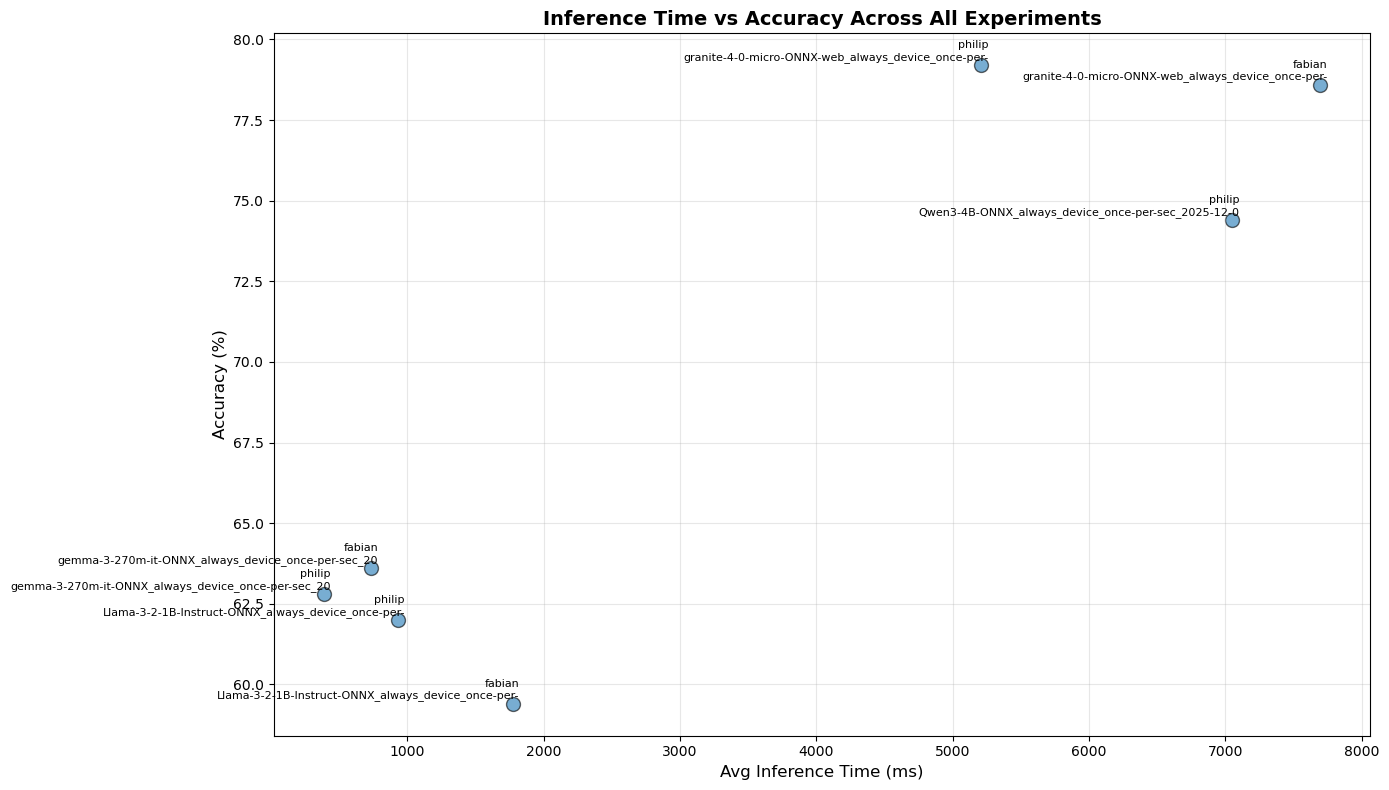

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data for plotting
inference_times = []
accuracies = []
labels = []

for key, df in stats_dfs.items():
    # Get the "overall" row
    overall_row = df[df['route'] == 'overall']
    
    if not overall_row.empty:
        avg_inference = overall_row['avg_inference_time_ms'].values[0]
        accuracy = overall_row['accuracy_percent'].values[0]
        
        inference_times.append(avg_inference)
        accuracies.append(accuracy)
        
        # Extract model name from filename and subfolder
        # key format: "subfolder/stats_experiment_MODEL_NAME_..."
        subfolder, filename = key.rsplit('/', 1) if '/' in key else ('root', key)
        model_name = filename.replace('stats_experiment_', '').split('_')[0:3]  # adjust based on your naming
        label = f"{subfolder}\n{filename.replace('stats_experiment_', '')[:50]}"  # truncate for readability
        labels.append(label)

# Create scatter plot
plt.figure(figsize=(14, 8))
plt.scatter(inference_times, accuracies, s=100, alpha=0.6, edgecolors='black')

# Add labels to each point
for i, label in enumerate(labels):
    plt.annotate(label, (inference_times[i], accuracies[i]), 
                fontsize=8, ha='right', xytext=(5, 5), 
                textcoords='offset points', wrap=True)

plt.xlabel('Avg Inference Time (ms)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Inference Time vs Accuracy Across All Experiments', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()